In [297]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier

In [298]:
data = pd.read_excel("test.xlsx")
data.head()

,hour,date_miladi,date_shamsi,code,unit_no,fuel_type,mvar,temp,moisture,power
0,1,2020-01-13,1398/10/23,SO,1,A,11,3,94,119
1,2,2020-01-13,1398/10/23,SO,1,A,11,3,96,119
2,3,2020-01-13,1398/10/23,SO,1,A,10,2,95,120
3,4,2020-01-13,1398/10/23,SO,1,A,11,2,95,120
4,5,2020-01-13,1398/10/23,SO,1,A,11,2,95,121


In [299]:
data=data[data["power"]>0]
data.shape

(922, 10)

In [300]:
# find categorical variables
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 3 categorical variables

The categorical variables are : ['date_shamsi', 'code', 'fuel_type']


In [301]:
# print categorical variables containing missing values
cat1 = [var for var in categorical if data[var].isnull().sum()!=0]
print(data[cat1].isnull().sum())


fuel_type    259
dtype: int64


In [302]:
data.isnull().sum()

hour             0
date_miladi      0
date_shamsi      0
code             0
unit_no          0
fuel_type      259
mvar             0
temp             0
moisture         0
power            0
dtype: int64

In [303]:
data['fuel_type'].value_counts()

A    663
Name: fuel_type, dtype: int64

In [304]:
# Change object to integer:
data[data["fuel_type"]=="A"] = 1 
data[data["fuel_type"]=="B"] = 2
data[data["fuel_type"]=="C"] = 3 

In [305]:
data['fuel_type'].value_counts()

1    663
Name: fuel_type, dtype: int64

In [306]:
data.isnull().sum()

hour             0
date_miladi      0
date_shamsi      0
code             0
unit_no          0
fuel_type      259
mvar             0
temp             0
moisture         0
power            0
dtype: int64

In [307]:
data["fuel_type"].fillna(method='bfill', inplace=True)

In [308]:
data.isnull().sum()

hour           0
date_miladi    0
date_shamsi    0
code           0
unit_no        0
fuel_type      0
mvar           0
temp           0
moisture       0
power          0
dtype: int64

In [333]:
data.fillna(data.mean, inplace=True)

In [310]:
data.isnull().sum()

hour           0
date_miladi    0
date_shamsi    0
code           0
unit_no        0
fuel_type      0
mvar           0
temp           0
moisture       0
power          0
dtype: int64

In [311]:
X = data[["moisture","unit_no","fuel_type","temp"]]
y = data["power"]
y

0      1
1      1
2      1
3      1
4      1
      ..
994    1
995    1
996    1
997    1
998    1
Name: power, Length: 922, dtype: int64

In [313]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X

,moisture,unit_no,fuel_type,temp
0,-0.529433,-0.619444,0.0,-0.470715
1,-0.529433,-0.619444,0.0,-0.470715
2,-0.529433,-0.619444,0.0,-0.470715
3,-0.529433,-0.619444,0.0,-0.470715
4,-0.529433,-0.619444,0.0,-0.470715
...,...,...,...,...
917,-0.529433,-0.619444,0.0,-0.470715
918,-0.529433,-0.619444,0.0,-0.470715
919,-0.529433,-0.619444,0.0,-0.470715
920,-0.529433,-0.619444,0.0,-0.470715


In [314]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

pca= PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print('The number of dimensions required to preserve 90% of variance is',dim)

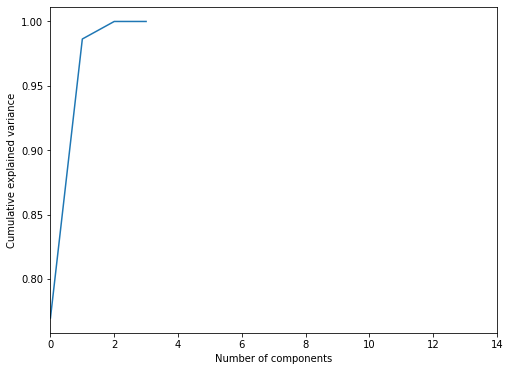

In [315]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,14,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

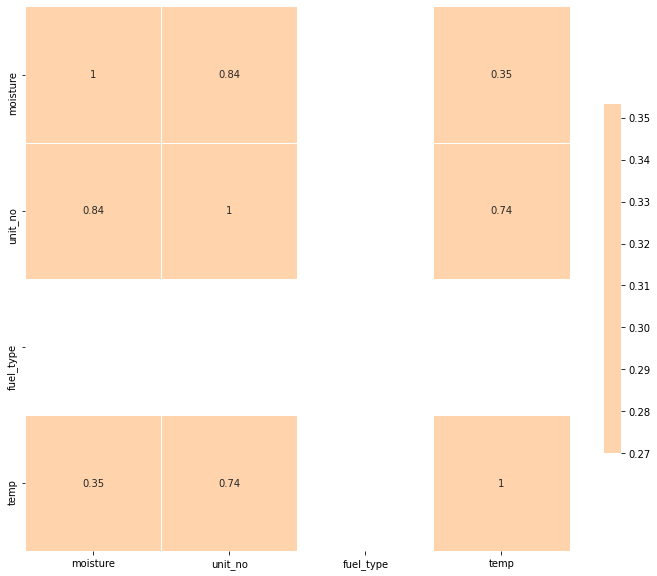

In [316]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train.corr(),vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.tight_layout()
plt.show()

In [317]:
pca=PCA().fit(X_train)
print(pca.explained_variance_ratio_)
print()
print(X_train.columns.values.tolist())
print(pca.components_)

[7.69636607e-01 2.16737393e-01 1.36260004e-02 9.88885806e-40]

['moisture', 'unit_no', 'fuel_type', 'temp']
[[ 5.63450886e-01  6.48876166e-01  0.00000000e+00  5.11353909e-01]
 [-6.43917118e-01 -4.28505360e-02  0.00000000e+00  7.63894349e-01]
 [-5.17584626e-01  7.59686483e-01 -0.00000000e+00 -3.93678298e-01]
 [-0.00000000e+00  8.56571433e-17  1.00000000e+00 -2.04857659e-16]]


In [318]:
dim_r = PCA(n_components=2)
dim_r.fit(X_train)
transformed = dim_r.transform(X_train)

In [319]:
transformed

array([[-0.96543812,  0.0217502 ],
       [ 2.12677676, -1.23618048],
       [-0.96543812,  0.0217502 ],
       ...,
       [-0.96543812,  0.0217502 ],
       [ 2.91232923,  3.06070102],
       [-0.96543812,  0.0217502 ]])

In [320]:
pca=PCA().fit(X_train)
print(pca.explained_variance_ratio_)
print()
print(X_train.columns.values.tolist())
print(pca.components_)

[7.69636607e-01 2.16737393e-01 1.36260004e-02 9.88885806e-40]

['moisture', 'unit_no', 'fuel_type', 'temp']
[[ 5.63450886e-01  6.48876166e-01  0.00000000e+00  5.11353909e-01]
 [-6.43917118e-01 -4.28505360e-02  0.00000000e+00  7.63894349e-01]
 [-5.17584626e-01  7.59686483e-01 -0.00000000e+00 -3.93678298e-01]
 [-0.00000000e+00  8.56571433e-17  1.00000000e+00 -2.04857659e-16]]


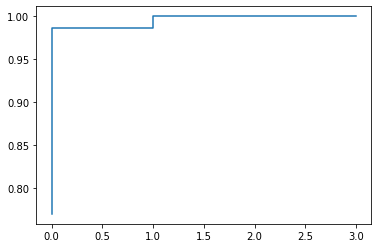

In [321]:
cumulative=np.cumsum(pca.explained_variance_ratio_)
plt.step([i for i in range(len(cumulative))],cumulative)
plt.show()

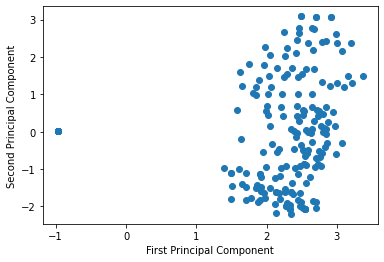

In [322]:
pca = PCA(n_components=2)
pca.fit(X_train)
reduced_data_train = pca.transform(X_train)
#inverse_data = pca.inverse_transform(reduced_data)
plt.scatter(reduced_data_train[:, 0], reduced_data_train[:, 1], label='reduced')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [323]:
pca = PCA(n_components=2)
pca.fit(X_train)
pca_samples = pca.transform(X_train)
ps = pd.DataFrame(pca_samples)
ps.head()

,0,1
0,-0.965438,0.021750
1,2.126777,-1.236180
2,-0.965438,0.021750
3,1.980024,-1.778604
4,-0.965438,0.021750


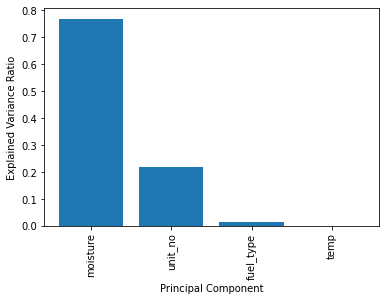

In [324]:
# Perform PCA
pca = PCA()
pca.fit(X_train)

# Get the explained variance ratio for each component
exp_var_ratio = pca.explained_variance_ratio_

# Plot a bar chart of the explained variance ratio
feature_names = list(X_train.columns)
# Plot a bar chart of the explained variance ratio with feature names
plt.bar(range(1, len(exp_var_ratio)+1), exp_var_ratio)
plt.xticks(range(1, len(feature_names)+1), feature_names, rotation=90)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

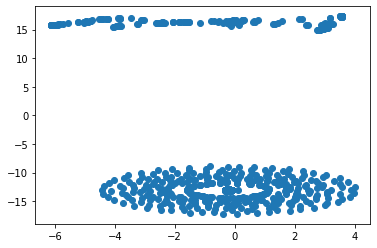

In [325]:
tsne = TSNE(n_components=2, perplexity=30)
X_tsne = tsne.fit_transform(X_train)
plt.scatter(X_tsne[:,0], X_tsne[:,1]) 
plt.show()

In [326]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42) 
rfc.fit(X_train, y_train)
importances = rfc.feature_importances_
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
sorted_features = feature_importances.sort_values('importance', ascending=False)
print(sorted_features['feature'])

0     moisture
1      unit_no
3         temp
2    fuel_type
Name: feature, dtype: object


In [327]:
# Training the Decision Tree Regression model on the whole dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [328]:
y_pred=regressor.predict(X_test)
y_pred.shape

(277,)

In [332]:
y_pred

array([  1., 104., 148., 146.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1., 139., 132., 122., 109., 146.,   1.,   1.,   1.,   1.,
         1., 147.,   1.,   1., 137., 147.,   1.,   1.,   1., 141.,   1.,
         1., 109.,   1.,   1., 147.,   1.,   1.,   1.,   1.,   1., 146.,
        62.,   1.,   1.,   1., 141., 130.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1., 120.,   1.,   1.,   1., 104.,   1.,
         1.,   1., 147.,   1.,   1.,   1.,   1.,   1.,   1.,   1., 104.,
         1., 110.,   1.,   1.,   1., 132.,   1.,  62.,   1.,   1.,   1.,
       147.,   1.,  31.,   1.,   1., 110.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1., 129., 147.,   1.,   1.,   1.,   1.,
       147.,   1.,   1.,   1., 119.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1., 148., 110., 148.,   1., 147.,   1.,   1.,
         1.,   1.,   1.,   1., 130.,   1.,   1.,   

In [330]:
y_test.shape

(277,)

In [331]:
y_test

685      1
427    103
371    146
803    147
313      1
      ... 
744      1
499      1
988      1
152    125
76       1
Name: power, Length: 277, dtype: int64